# Previsão de preços de ações utilizando XGBoost

O XGBoost é um modelo que deriva do Gradient Boosted Decision Trees.
O modelo de Gradient Boosted Decision Trees combina várias árvores "fracas" de forma consecutiva para criar um modelo preditivo forte. 

Ele é capaz de fazer regularizações L1 (lasso) e L2 (ridge) e preenchimento de valores ausentes no programa, diminuindo as chances de overfitting e automaticamente preenchendo valores não presentes ou não identificados pelo programa. Ele também permite visualizar quais variáveis mais influenciam no modelo. 

- Cria várias árvores de decisão sequenciais

A primeira (ou primeiras) árvores são apenas um pouco melhores do que uma previsão comum, logo tendem a ser ruins. 
Após fazer a previsão inicial, o modelo calcula o erro residual, que é a diferença entre o valor real e o valor previsto.

$Erro = 𝑦real − 𝑦previsto$

- Cada árvore aprende com os erros da anterior usando o gradiente dos resíduos

- Dá pesos maiores aos erros difíceis de corrigir

Cada árvore recebe um peso de importância com base em sua contribuição. Árvores que reduzem mais os erros têm maior peso.

- Soma todas as árvores para obter a previsão final

As funções de custo podem ser ajustadas a depender do problema, seja ele classificatório ou regressivo.

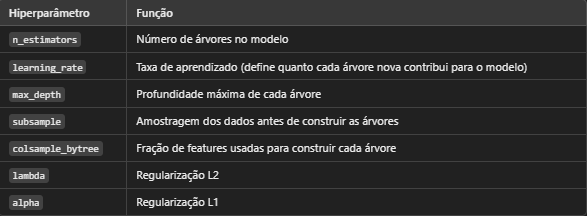


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


1.0


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


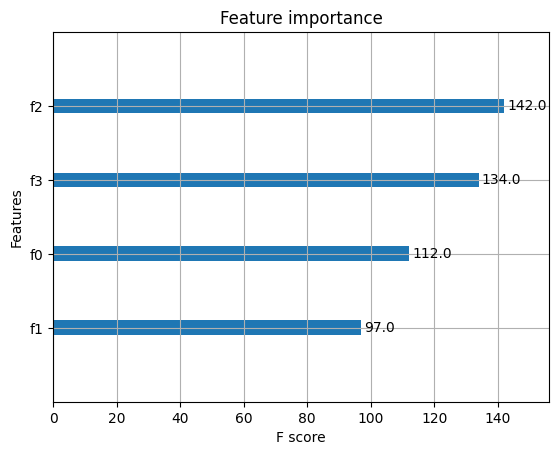

In [11]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.show()

Cada feature simboliza algo do dataset Iris: 
- f0: Comprimento da sépala (sepal length)
- f1: Largura da sépala (sepal width)
- f2: Comprimento da pétala (petal length)
- f3: Largura da pétala (petal width)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


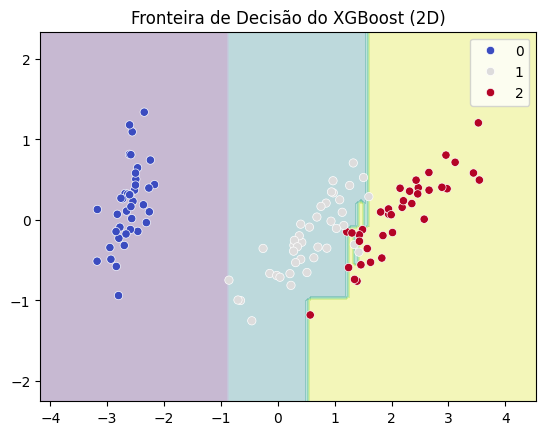

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

model_2D = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_2D.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_2D[:, 0], y=X_train_2D[:, 1], hue=y_train, palette='coolwarm')
plt.title("Fronteira de Decisão do XGBoost (2D)")
plt.show()

Veja que os valores 0, 1 e 2 correspondem cada um a um tipo diferente de flor Iris, e que os espaços onde elas se encontram são as divisões que o próprio modelo criou para separá-las.

Essas divisões são essenciais pois permitem visualizar onde outros grupos de plantas até mesmo fora desse dataset poderiam se encaixar de acordo com o programa. Claro que esse cenário tende a mudar com casos mais complexos (esse caso é relativamente simples), mas só de se ter uma "borda" que separa um tipo do outro significa que o modelo atingiu bem o objetivo de classificação.

Fizemos esse modelo introdutório com o dataset Iris do Kaggle para analisar e entender melhor alguns conceitos. 

O treinamento do modelo segue a lógica da maioria dos modelos de ML: 

- Carregar dataset
- Dividir em treino e teste
- Criar e treinar modelo
- Fazer previsões
- Avaliar modelo
- Plotar resultados

Mas a pergunta é: como aplicar isso para previsão de preços de ativos?